In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import geopandas as gpd

In [2]:
# Load data into the notebook
Distribution_Data = pd.read_csv("C:/Users/PC/Downloads/ev_distribution_dataset.csv")
Geospatial_Data = pd.read_csv("C:/Users/PC/Downloads/geospatial_dataset.csv")
Weather_Data = pd.read_csv("C:/Users/PC/Downloads/weather_dataset.csv")

In [3]:
Distribution_Data.head()

,Timestamp,Geographical_Area,Customer_Type,Electricity_Consumption (kWh),EV_Charging_Station_Location,EV_Charging_Station_Specifications,EV_Type,Charging_Habit,Number_of_EVs,Substation_ID
0,2020-01-10 18:00:00,Urban,Industrial,714.394409,"(64.01943603679787, -129.53196438913122)",Type 2,Electric Car,Occasional,8,Substation_907
1,2020-01-22 17:00:00,Rural,Residential,554.336019,"(48.447826648452946, -71.98859080823637)",Type 2,Electric Scooter,Weekly,5,Substation_907
2,2020-01-10 18:00:00,Urban,Industrial,714.394409,"(64.01943603679787, -129.53196438913122)",Type 2,Electric Car,Occasional,8,Substation_907
3,2020-01-22 17:00:00,Rural,Residential,554.336019,"(48.447826648452946, -71.98859080823637)",Type 2,Electric Scooter,Weekly,5,Substation_907
4,2020-01-10 18:00:00,Urban,Industrial,714.394409,"(64.01943603679787, -129.53196438913122)",Type 2,Electric Car,Occasional,8,Substation_907


In [4]:
Geospatial_Data.head()

,Substation_ID,Substation_Location,Transmission_Line_Capacity (MW)
0,Substation_907,"(57.25813554648914, -70.90582041775649)",40
1,Substation_218,"(70.02538473360673, -84.38057237161145)",71
2,Substation_339,"(80.39323542610704, -75.79784143914193)",85
3,Substation_773,"(49.12307771334813, -87.3598904388042)",10
4,Substation_349,"(66.79887060665365, -86.51124108848195)",40


In [5]:
Weather_Data.head()

,Timestamp,Temperature (°C),Precipitation (mm),Weather_Conditions,Substation_ID
0,2020-01-03 11:00:00,28.865989,0.313611,Snowy,Substation_744
1,2020-01-03 17:00:00,28.902260,0.817728,Clear,Substation_516
2,2020-01-04 04:00:00,24.212651,4.516506,Clear,Substation_261
3,2020-01-04 23:00:00,29.024606,3.821278,Snowy,Substation_560
4,2020-01-05 00:00:00,24.126655,4.965771,Snowy,Substation_258


In [6]:
#Check data types and missing values
Geospatial_Data.info()
#Description of numerical columns
Geospatial_Data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 3 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   Substation_ID                    50 non-null     object
 1   Substation_Location              50 non-null     object
 2   Transmission_Line_Capacity (MW)  50 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.3+ KB


,Transmission_Line_Capacity (MW)
count,50.000000
mean,52.740000
std,24.857808
min,10.000000
25%,33.250000
50%,51.500000
75%,74.750000
max,94.000000


In [7]:
#Check data types and missing values
Distribution_Data.info()
#Description of numerical columns
Distribution_Data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 10 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Timestamp                           500 non-null    object 
 1   Geographical_Area                   500 non-null    object 
 2   Customer_Type                       500 non-null    object 
 3   Electricity_Consumption (kWh)       500 non-null    float64
 4   EV_Charging_Station_Location        500 non-null    object 
 5   EV_Charging_Station_Specifications  500 non-null    object 
 6   EV_Type                             500 non-null    object 
 7   Charging_Habit                      500 non-null    object 
 8   Number_of_EVs                       500 non-null    int64  
 9   Substation_ID                       500 non-null    object 
dtypes: float64(1), int64(1), object(8)
memory usage: 39.2+ KB


,Electricity_Consumption (kWh),Number_of_EVs
count,500.000000,500.000000
mean,506.188554,5.240000
std,80.251238,2.577535
min,315.912577,1.000000
25%,439.978312,3.000000
50%,505.820872,5.000000
75%,557.230712,8.000000
max,718.980293,9.000000


In [8]:
#Check data types and missing values
Weather_Data.info()
#Description of numerical columns
Weather_Data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Timestamp           97 non-null     object 
 1   Temperature (°C)    97 non-null     float64
 2   Precipitation (mm)  97 non-null     float64
 3   Weather_Conditions  97 non-null     object 
 4   Substation_ID       97 non-null     object 
dtypes: float64(2), object(3)
memory usage: 3.9+ KB


,Temperature (°C),Precipitation (mm)
count,97.000000,97.000000
mean,25.311668,2.542096
std,4.821917,1.396957
min,12.449425,0.007923
25%,22.245088,1.390244
50%,25.248302,2.688862
75%,28.902260,3.656106
max,34.104493,4.965771


C:\Users\PC\AppData\Local\Temp\ipykernel_2300\3927928905.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=Distribution_Data, y="EV_Type", ax=axes[0, 1], palette=ev_type_palette)
C:\Users\PC\AppData\Local\Temp\ipykernel_2300\3927928905.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=Distribution_Data, y="Charging_Habit", ax=axes[1, 0], palette=charging_habit_palette)
C:\Users\PC\AppData\Local\Temp\ipykernel_2300\3927928905.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=Distribution_Data, y="Customer_Type", 

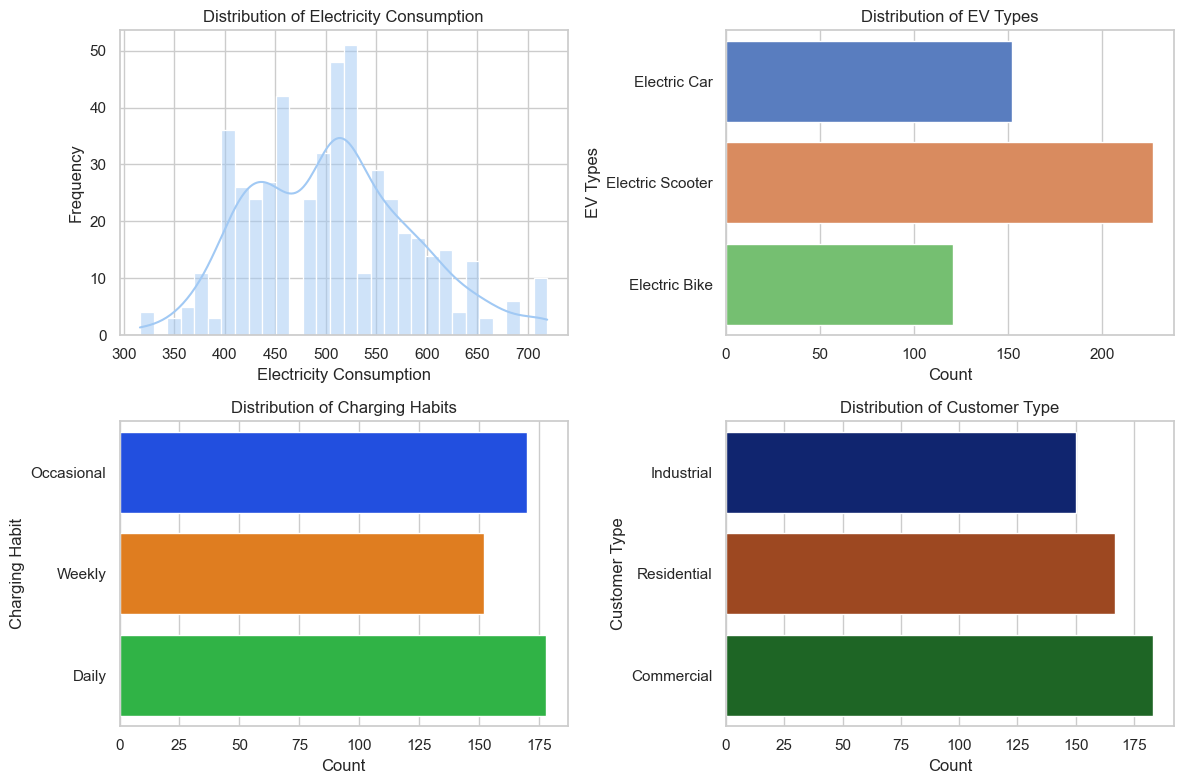

In [9]:
# set the style of the plots
sns.set(style="whitegrid")

# Create a 2 by 2 subplot grid
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

# Define custom palettes with the exact number of colors needed
ev_type_palette = sns.color_palette("muted", len(Distribution_Data["EV_Type"].unique()))
charging_habit_palette = sns.color_palette("bright", len(Distribution_Data["Charging_Habit"].unique()))
customer_type_palette = sns.color_palette("dark", len(Distribution_Data["Customer_Type"].unique()))

# Plot distribution of electricity consumption
sns.histplot(data=Distribution_Data, x="Electricity_Consumption (kWh)", bins=30, kde=True, ax=axes[0, 0], color=sns.color_palette("pastel")[0])
axes[0, 0].set_title("Distribution of Electricity Consumption")
axes[0, 0].set_xlabel("Electricity Consumption")
axes[0, 0].set_ylabel("Frequency")

# Plot the distribution of EV types
sns.countplot(data=Distribution_Data, y="EV_Type", ax=axes[0, 1], palette=ev_type_palette)
axes[0, 1].set_title("Distribution of EV Types")
axes[0, 1].set_xlabel("Count")
axes[0, 1].set_ylabel("EV Types")

# Plot the distribution of Charging Habits
sns.countplot(data=Distribution_Data, y="Charging_Habit", ax=axes[1, 0], palette=charging_habit_palette)
axes[1, 0].set_title("Distribution of Charging Habits")
axes[1, 0].set_xlabel("Count")
axes[1, 0].set_ylabel("Charging Habit")

# Plot the distribution of Customer Type
sns.countplot(data=Distribution_Data, y="Customer_Type", ax=axes[1, 1], palette=customer_type_palette)
axes[1, 1].set_title("Distribution of Customer Type")
axes[1, 1].set_xlabel("Count")
axes[1, 1].set_ylabel("Customer Type")

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()


In [10]:
Distribution_Data.head()

,Timestamp,Geographical_Area,Customer_Type,Electricity_Consumption (kWh),EV_Charging_Station_Location,EV_Charging_Station_Specifications,EV_Type,Charging_Habit,Number_of_EVs,Substation_ID
0,2020-01-10 18:00:00,Urban,Industrial,714.394409,"(64.01943603679787, -129.53196438913122)",Type 2,Electric Car,Occasional,8,Substation_907
1,2020-01-22 17:00:00,Rural,Residential,554.336019,"(48.447826648452946, -71.98859080823637)",Type 2,Electric Scooter,Weekly,5,Substation_907
2,2020-01-10 18:00:00,Urban,Industrial,714.394409,"(64.01943603679787, -129.53196438913122)",Type 2,Electric Car,Occasional,8,Substation_907
3,2020-01-22 17:00:00,Rural,Residential,554.336019,"(48.447826648452946, -71.98859080823637)",Type 2,Electric Scooter,Weekly,5,Substation_907
4,2020-01-10 18:00:00,Urban,Industrial,714.394409,"(64.01943603679787, -129.53196438913122)",Type 2,Electric Car,Occasional,8,Substation_907


In [11]:
# Extract lat and long for EV charging stations
Distribution_Data['ev_latitude'] = Distribution_Data["EV_Charging_Station_Location"].apply(lambda x: float(x.split(",")[0].replace("(", "").strip()))
Distribution_Data['ev_longitude'] = Distribution_Data["EV_Charging_Station_Location"].apply(lambda x: float(x.split(",")[1].replace(")", "").strip()))

# Extract lat and long for substation location
Geospatial_Data['Substation_latitude'] = Geospatial_Data["Substation_Location"].apply(lambda x: float(x.split(",")[0].replace("(", "").strip()))
Geospatial_Data['Substation_longitude'] = Geospatial_Data["Substation_Location"].apply(lambda x: float(x.split(",")[1].replace(")", "").strip()))

# Drop the original location columns to clean up the dataframe
Distribution_Data = Distribution_Data.drop(columns=["EV_Charging_Station_Location"])
Geospatial_Data = Geospatial_Data.drop(columns=["Substation_Location"])

In [12]:
Distribution_Data.head()

,Timestamp,Geographical_Area,Customer_Type,Electricity_Consumption (kWh),EV_Charging_Station_Specifications,EV_Type,Charging_Habit,Number_of_EVs,Substation_ID,ev_latitude,ev_longitude
0,2020-01-10 18:00:00,Urban,Industrial,714.394409,Type 2,Electric Car,Occasional,8,Substation_907,64.019436,-129.531964
1,2020-01-22 17:00:00,Rural,Residential,554.336019,Type 2,Electric Scooter,Weekly,5,Substation_907,48.447827,-71.988591
2,2020-01-10 18:00:00,Urban,Industrial,714.394409,Type 2,Electric Car,Occasional,8,Substation_907,64.019436,-129.531964
3,2020-01-22 17:00:00,Rural,Residential,554.336019,Type 2,Electric Scooter,Weekly,5,Substation_907,48.447827,-71.988591
4,2020-01-10 18:00:00,Urban,Industrial,714.394409,Type 2,Electric Car,Occasional,8,Substation_907,64.019436,-129.531964


In [13]:
Geospatial_Data.head()

,Substation_ID,Transmission_Line_Capacity (MW),Substation_latitude,Substation_longitude
0,Substation_907,40,57.258136,-70.905820
1,Substation_218,71,70.025385,-84.380572
2,Substation_339,85,80.393235,-75.797841
3,Substation_773,10,49.123078,-87.359890
4,Substation_349,40,66.798871,-86.511241


In [20]:
# Group the ev distribution data by substation id and calculate the total electricity consumption for each substation
total_consumption_per_substation = Distribution_Data.groupby ("Substation_ID")["Electricity_Consumption (kWh)"].sum().reset_index()
# merging the total consumption data with geospatial data
network_capacity_data = pd.merge(Geospatial_Data, total_consumption_per_substation, on = "Substation_ID")
# Renaminthe columns for better understanding 
network_capacity_data.rename(columns = {"Electricity_Consumption (kWh)" : "Total_Consumption (kWh)"}, inplace= True)
# Calculating ratio of total consumption to transimission line capacity
# conversion: 1 MW = 1000kWh
network_capacity_data["Consumption_to_Capacity_Ratio"] = network_capacity_data["Total_Consumption (kWh)"] / (network_capacity_data["Transmission_Line_Capacity (MW)"] * 1000)

In [21]:
network_capacity_data.head()

,Substation_ID,Transmission_Line_Capacity (MW),Substation_latitude,Substation_longitude,Total_Consumption (kWh),Consumption_to_Capacity_Ratio
0,Substation_907,40,57.258136,-70.905820,6663.768920,0.166594
1,Substation_218,71,70.025385,-84.380572,5997.437051,0.084471
2,Substation_339,85,80.393235,-75.797841,4536.778685,0.053374
3,Substation_773,10,49.123078,-87.359890,4426.337993,0.442634
4,Substation_349,40,66.798871,-86.511241,4901.836555,0.122546


In [22]:
from shapely.geometry import Point

In [31]:
# # Create the Geodataframe for the network capacity for the dataframes
# geometry_network_capacity = [Point(lon, lat) for lon, lat in zip (network_capacity_data["Substation_longitude"], network_capacity_data["Substation_latitude"])]
# gdf_network_capacity = gpd.GeoDataFrame(network_capacity_data, geometry=geometry_network_capacity)
# # plotting in choropleth style
# fig, ax = plt.subplots(figsize = (12, 12))
# world = gpd.read_file(gpd.datasets.get_path(https://geodatasets.readthedocs.io/en/latest/))
# north_america = world[world['continent'] == 'North America']
# north_america.plot(ax+ax, color = "lightgray", edgecolor = "black")
# gdf_network_capacity.plot(column = "Consumption_to_Capacity_Ratio", cmap = "coolwarm", legend = True, marker = "s", markersize = 100, ax = ax, legend_kwds={"label": "Consumption to Capacity Ratio", "orientation": "horizontal"})
# ax.set_title("Consumption to Capacity Ratio of Substations")
# ax.set_xlabel("Longitude")
# ax.set_ylabel("Latitude")
# plt.tight_layout()
# plt.show()

In [35]:
#group by the substation_id for the number of evs
ev_counts = Distribution_Data.groupby("Substation_ID")["Number_of_EVs"].sum().reset_index()
#merge network capacity data with ev counts
final_data = pd.merge(ev_counts, network_capacity_data, on = "Substation_ID")
#CORRELATION
correlation_ratio = final_data["Number_of_EVs"].corr(final_data["Consumption_to_Capacity_Ratio"])

In [37]:
correlation_ratio

-0.10944923035990646

<function matplotlib.pyplot.show(close=None, block=None)>

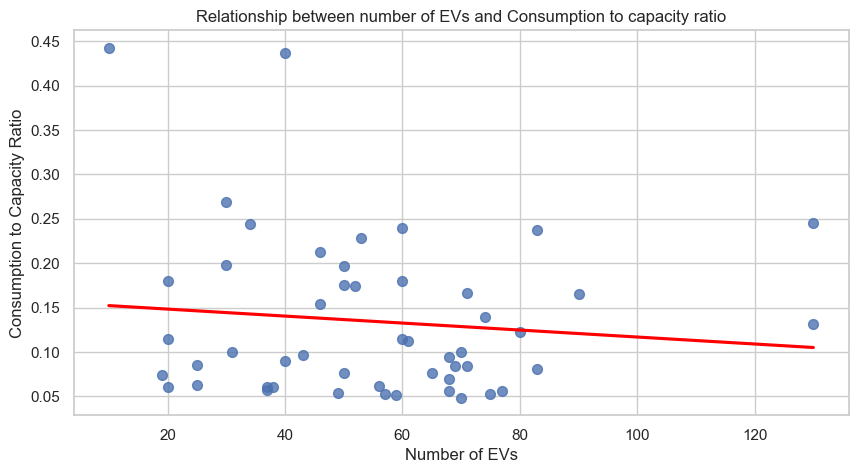

In [38]:
#scatter plot with regression line
plt.figure(figsize = (10, 5))
sns.regplot(x="Number_of_EVs", y="Consumption_to_Capacity_Ratio", data=final_data, scatter_kws = {"s" : 50}, line_kws={"color":"red"}, ci = None)
plt.title("Relationship between number of EVs and Consumption to capacity ratio")
plt.xlabel("Number of EVs")
plt.ylabel("Consumption to Capacity Ratio")
plt.grid(True)
plt.tight_layout
plt.show

In [39]:
# Filtering c2c greater than 1
bottleneck_substation = network_capacity_data[network_capacity_data["Consumption_to_Capacity_Ratio"]>= 0.9]

In [40]:
# displaying
bottleneck_substation

,Substation_ID,Transmission_Line_Capacity (MW),Substation_latitude,Substation_longitude,Total_Consumption (kWh),Consumption_to_Capacity_Ratio


In [41]:
top_5_substations = network_capacity_data.nlargest(5, "Consumption_to_Capacity_Ratio")
top_5_substations

,Substation_ID,Transmission_Line_Capacity (MW),Substation_latitude,Substation_longitude,Total_Consumption (kWh),Consumption_to_Capacity_Ratio
3,Substation_773,10,49.123078,-87.359890,4426.337993,0.442634
14,Substation_87,12,81.031814,-92.941747,5243.800714,0.436983
26,Substation_711,17,36.618181,-117.277556,4579.354677,0.269374
46,Substation_11,43,33.082269,-113.118931,10534.827701,0.244996
41,Substation_258,22,42.952789,-106.049333,5378.214378,0.244464


In [44]:
#  merge weather data with distribution data
merged_data = pd.merge(Distribution_Data, Weather_Data, on = ["Timestamp", "Substation_ID"])
# Calculate the correlation between weather condition and electricity consumption
correlation_matrix= merged_data[["Electricity_Consumption (kWh)", "Temperature (°C)", "Precipitation (mm)"]].corr()
# Display
correlation_matrix

,Electricity_Consumption (kWh),Temperature (°C),Precipitation (mm)
Electricity_Consumption (kWh),1.000000,0.131543,0.085014
Temperature (°C),0.131543,1.000000,-0.005828
Precipitation (mm),0.085014,-0.005828,1.000000


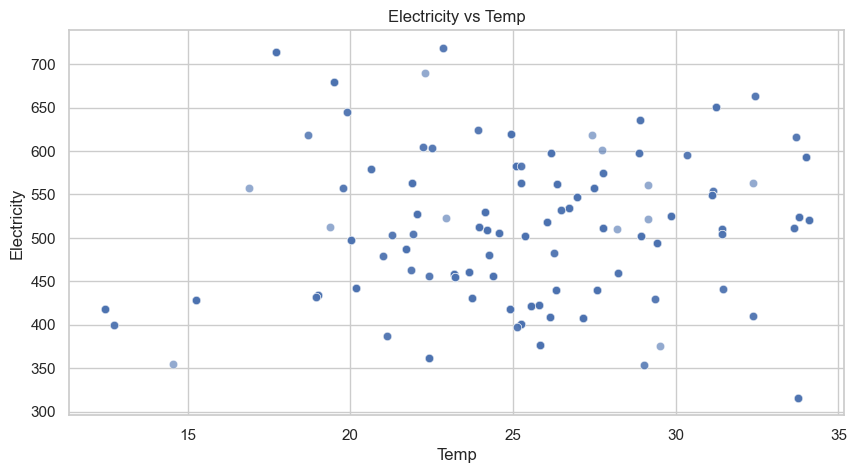

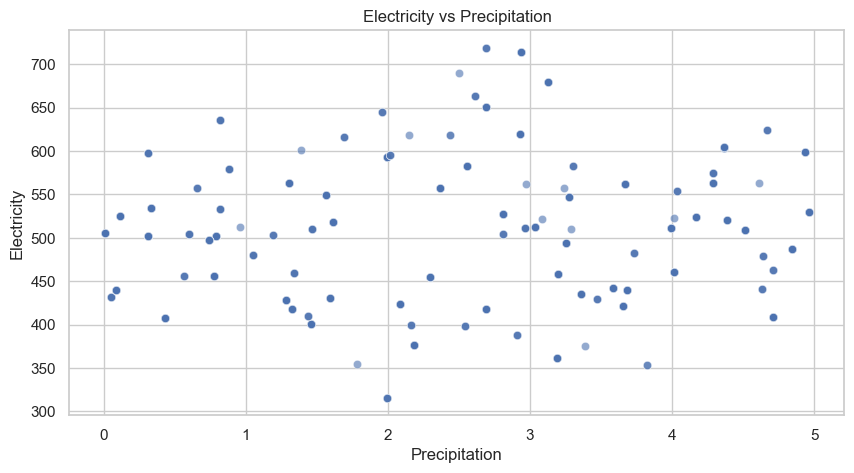

In [55]:
# Electricity consumption vs temp
plt.figure(figsize = (10, 5))
sns.scatterplot(data = merged_data, x="Temperature (°C)", y = "Electricity_Consumption (kWh)", alpha = 0.6)
plt.title("Electricity vs Temp")
plt.xlabel("Temp")
plt.ylabel("Electricity")
plt.show()

# electricity vs precipitation
plt.figure(figsize = (10, 5))
sns.scatterplot(data = merged_data, x="Precipitation (mm)", y = "Electricity_Consumption (kWh)", alpha = 0.6)
plt.title("Electricity vs Precipitation")
plt.xlabel("Precipitation")
plt.ylabel("Electricity")
plt.show()
